# Testing code for cost function "elasticity" on the annulus

In [1]:
%pylab inline

import dionysus

Populating the interactive namespace from numpy and matplotlib


## Constructing the annulus and combuting the cocycle

(-2.115429963970202,
 2.1844199605937673,
 -2.1243171820310067,
 2.166536911486436)

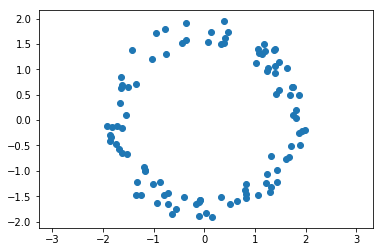

In [2]:
R = 1.5
d = .5
n = 100

# r in [0,1]
# th in [0,2pi)

from math import sin, cos, pi
from random import uniform
def rand_annulus_pt():
    r = uniform(0,1)
    th = uniform(0,2*pi)
    return (R+r*d) * cos(th), (R+r*d) * sin(th)
annulus = np.array([(rand_annulus_pt()) for x in range(100)])
plt.scatter(*annulus.T)
plt.axis('equal')

In [3]:
prime = 19
vr = dionysus.fill_rips(annulus, 2, 4.)
cp = dionysus.cohomology_persistence(vr, prime, True)
dgms = dionysus.init_diagrams(cp, vr)

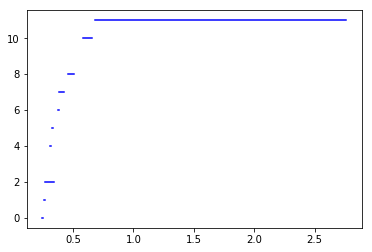

In [4]:
dionysus.plot.plot_bars(dgms[1], show=True)

In [5]:
bars = [bar for bar in dgms[1] if bar.death > 1.]
bars

[(0.682181,2.76356)]

In [6]:
cocycles = [cp.cocycle(bar.data) for bar in bars]
vr_8 = dionysus.Filtration([s for s in vr if s.data <= 1.0])
coords = [dionysus.smooth(vr_8, cocycle, prime) for cocycle in cocycles]

(-2.115429963970202,
 2.1844199605937673,
 -2.1243171820310067,
 2.166536911486436)

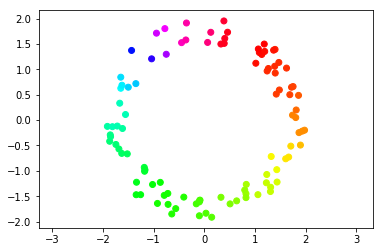

In [7]:
# subplot(121)#, projection="3d")
scatter(*annulus.T, c=coords[0], cmap="hsv")
plt.axis('equal')

# subplot(122)#, projection="3d")
# scatter(*annulus.T, c=coords[1], cmap="hsv")

## Running TensorFlow

In [8]:
import tensorflow as tf
# import coboundary_D2 as cbd

In [9]:
D = {}
data = {}
indexing = {}
ix = [0]*50
thr = 3
for s in vr:
    if s.dimension() == 0:
        continue
    elif s.data > thr:
        break
    D.setdefault(s.dimension(),[[],[]])
    data.setdefault(s.dimension(),[])
    indexing.setdefault(s.dimension(),{})
    indexing.setdefault(s.dimension()-1,{})
    if not s in indexing[s.dimension()]:
        indexing[s.dimension()][s] = ix[s.dimension()]
        ix[s.dimension()] += 1
    for dat, k in enumerate(s.boundary()): 
        if not k in indexing[s.dimension()-1]:
            indexing[s.dimension()-1][k] = ix[s.dimension()-1]
            ix[s.dimension()-1] += 1
        D[s.dimension()][0].append(indexing[s.dimension()][s]) #rows
        D[s.dimension()][1].append(indexing[s.dimension()-1][k]) #cols
        if dat%2:
            data[s.dimension()].append(-1)
        else:
            data[s.dimension()].append(1)
import scipy as sp
CBd = [sp.sparse.csr_matrix((data[d], (D[d][0], D[d][1]))).todense() for d in range(1,max(D.keys())+1)]

In [10]:
n, m = CBd[0].shape
l = array([1])

f = np.zeros((n,1))
for c2 in cocycles[0]:
    f[indexing[1][vr[c2.index]]] = c2.element
bdry = CBd[0]

In [11]:
# Z = tf.get_variable("Z", (m,1), dtype=tf.float32)
l2_cocycle = [0]*len(coords[0])
for i, coeff in enumerate(coords[0]):
    l2_cocycle[indexing[0][dionysus.Simplex([i],0)]] = coeff
# 
Z = tf.get_variable("Z", dtype=tf.float32, initializer= np.array(l2_cocycle,dtype= float32).reshape(m,1))
F = tf.placeholder(dtype=tf.float32, shape=(n,1))
B = tf.placeholder(dtype=tf.float32, shape=(n,m))
L = tf.placeholder(dtype=tf.float32, shape=(1,))

In [12]:
cost = tf.reduce_sum(tf.square(F - B@Z))# + L*tf.reduce_sum(tf.abs(Z))
# cost = tf.reduce_sum(tf.square(F - B@Z)) + L*tf.reduce_sum(tf.norm(B@Z,ord= 2))

In [13]:
optimizer = tf.train.AdamOptimizer(.01)
train = optimizer.minimize(cost)

In [14]:
init = tf.global_variables_initializer()

# change initializer to L2 smoothed - coords[0]



In [24]:
Zv = None
# Zinit = tf.assign(Z,coords[0])
with tf.Session() as session:
    session.run(init)
    for i in range(1000):
        session.run(train, {F:f, B:bdry, L: l})
        if i%1000 == 0:
            print(session.run(cost, {F:f, B:bdry, L: l}))
    Zv = session.run(Z)
Zv

54225.35


array([[ 1.9186258 ],
       [ 1.9186258 ],
       [ 1.9186258 ],
       [ 1.2560825 ],
       [ 1.24611   ],
       [ 4.172949  ],
       [ 2.9243612 ],
       [ 3.2730064 ],
       [ 2.3437512 ],
       [ 0.9584917 ],
       [ 0.9584916 ],
       [ 3.2131226 ],
       [ 2.3197546 ],
       [ 1.2058805 ],
       [ 2.974905  ],
       [ 2.3812134 ],
       [ 2.4217494 ],
       [ 1.5644062 ],
       [ 1.0128158 ],
       [ 1.0273964 ],
       [ 1.3248627 ],
       [-3.194702  ],
       [ 2.6004436 ],
       [ 2.5702102 ],
       [ 3.119319  ],
       [ 1.8714077 ],
       [ 4.4400973 ],
       [ 2.184483  ],
       [ 2.2003546 ],
       [ 2.250616  ],
       [ 3.3658793 ],
       [ 3.277969  ],
       [ 1.6510463 ],
       [ 1.6580118 ],
       [ 3.0962825 ],
       [ 2.4675674 ],
       [ 2.3704834 ],
       [ 1.5425467 ],
       [ 1.5599695 ],
       [ 1.0316746 ],
       [ 0.88051134],
       [ 0.97935635],
       [-3.3592818 ],
       [ 1.5846674 ],
       [-1.813929  ],
       [ 0

(-2.115429963970202,
 2.1844199605937673,
 -2.1243171820310067,
 2.166536911486436)

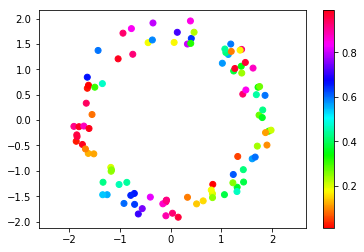

In [25]:
messed_ix = [indexing[0][dionysus.Simplex([n],0)] for n in range(100)]
color = np.mod(Zv.T[:,messed_ix],1)
scatter(*annulus.T, c=color[0], cmap="hsv")
plt.colorbar()
plt.axis('equal')

(array([10.,  7.,  6.,  4.,  1.,  0.,  2.,  0.,  2.,  1.,  3.,  2.,  5.,
         4., 16.,  6.,  4., 10., 10.,  7.]),
 array([8.6851418e-05, 4.9989536e-02, 9.9892214e-02, 1.4979491e-01,
        1.9969758e-01, 2.4960026e-01, 2.9950294e-01, 3.4940565e-01,
        3.9930832e-01, 4.4921100e-01, 4.9911368e-01, 5.4901636e-01,
        5.9891903e-01, 6.4882171e-01, 6.9872439e-01, 7.4862713e-01,
        7.9852980e-01, 8.4843248e-01, 8.9833516e-01, 9.4823784e-01,
        9.9814051e-01], dtype=float32),
 <a list of 20 Patch objects>)

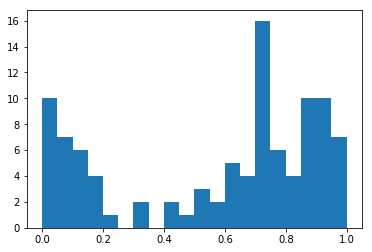

In [17]:
plt.hist(color[0], bins= 20)